# Scipy基础学习

In [1]:
import scipy as sp
import numpy as np
sp.__version__

'1.3.1'

## 常量模块 

为了方便科学计算，Scipy提供了scipy.constants模块，该模块下包含了常用的物理和数学常数及单位  
不需记忆，使用时直接查阅相关文档即可

In [2]:
from scipy import constants

使用圆周率、黄金分割比、光速等科学常量

In [3]:
print(sp.constants.pi)
print(sp.constants.golden)
print(sp.constants.c)

3.141592653589793
1.618033988749895
299792458.0


更多操作详见文档https://docs.scipy.org/doc/scipy/reference/constants.html#module-scipy.constants

## 线性代数模块 

Scipy提供了全面而详细的线性代数模块，放置在模块scipy.linalg(linear algebra每个单词的前三个字母)  
可以解决：基本求解方法、特征值问题、矩阵分解、矩阵函数、矩阵方程求解、特殊矩阵构造等几个小类

In [4]:
from scipy import linalg

求给定矩阵的逆，可以用到scipy.linalg.inv函数，传入的数据一般为np.array和np.matrix类型

In [5]:
sp.linalg.inv(np.array([[1,2],[3,4]]))

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

使用scipy.linalg.svd函数还可以完成奇异值分解等操作

In [6]:
A=np.random.randn(5,5)
print(A)
sp.linalg.svd(np.random.randn(5,5))

[[ 1.69807995 -1.18377647 -2.32668083  2.55649998 -1.38532361]
 [ 0.06794411 -0.88759293 -0.81216051 -0.09935685 -1.07618448]
 [ 0.81099797 -1.48018993  1.31315626 -1.03294175  0.48282236]
 [ 0.0072539  -1.30513477 -1.61904867  0.0540824   0.17051152]
 [-0.36531706 -0.84841563  0.47265617 -1.46433586 -1.84270885]]


(array([[-0.05342902, -0.65264647, -0.52959645,  0.53009546,  0.09861202],
        [ 0.10478611,  0.31089265,  0.38864172,  0.82649437, -0.24130955],
        [ 0.35047961,  0.61402434, -0.69730413,  0.07824479,  0.0882205 ],
        [-0.45657657,  0.22656727,  0.09532187,  0.1723618 ,  0.83750239],
        [-0.80923859,  0.22144915, -0.27049197,  0.00866183, -0.47207229]]),
 array([4.34964041, 2.63197577, 1.73689493, 1.38666629, 0.06307067]),
 array([[ 0.37142246, -0.59946011, -0.00600959,  0.02606629, -0.70850361],
        [ 0.82998306,  0.05235645, -0.39135809, -0.0045188 ,  0.3939611 ],
        [-0.32013309, -0.25490439, -0.67474059, -0.61343503,  0.03100243],
        [ 0.05077794, -0.57966687,  0.53711386, -0.35116987,  0.49959619],
        [-0.2609787 , -0.48674064, -0.32099309,  0.70687857,  0.30374296]]))

同时，scipy.linalg还提供了解决最小二乘法问题的函数lstsq  
假设x和y满足y=ax^2+b

In [7]:
x = np.array([1, 2.5, 3.5, 4, 5, 7, 8.5])
y = np.array([0.3, 1.1, 1.5, 2.0, 3.2, 6.6, 8.6])

In [8]:
M = x[:, np.newaxis]
#为ndarray新开辟了一个维度，也可以写作x.reshape(7,1)
M=M**np.array([0,2])
#利用python的广播特性
M

array([[ 1.  ,  1.  ],
       [ 1.  ,  6.25],
       [ 1.  , 12.25],
       [ 1.  , 16.  ],
       [ 1.  , 25.  ],
       [ 1.  , 49.  ],
       [ 1.  , 72.25]])

In [9]:
p=sp.linalg.lstsq(M,y)[0]
p

array([0.20925829, 0.12013861])

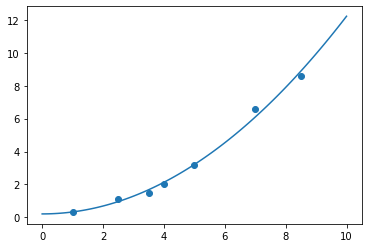

In [10]:
#查看一下最小二乘拟合的结果
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x,y)
xx=np.linspace(0,10,100).reshape(100,1)
yy=xx**2*p[1]+p[0]
plt.plot(xx,yy)

更多操作详见文档https://docs.scipy.org/doc/scipy/reference/linalg.html#module-scipy.linalg

## 插值函数 

插值，是数值分析领域中根据已知的、离散的数据点，在一定范围内求新的数据点的过程和方法。  
Scipy提供的scipy.interpolate模块下包含了广泛的插值方法

In [11]:
from scipy import interpolate

演示一下线性插值的实现过程

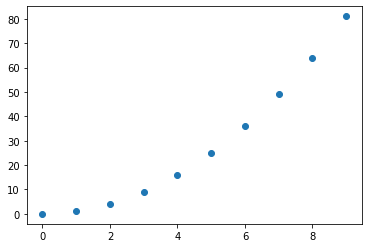

In [12]:
x=np.array([0,1,2,3,4,5,6,7,8,9])
y=np.array([0,1,4,9,16,25,36,49,64,81])
plt.scatter(x,y)

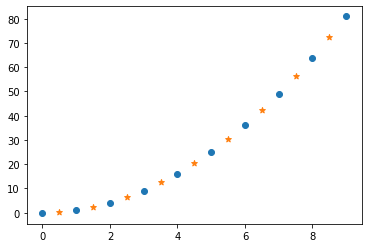

In [13]:
xx=np.array([0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5])
f=interpolate.interp1d(x,y)
yy=f(xx)
plt.scatter(x,y)
plt.scatter(xx,yy,marker="*")
#使用*绘出插值拟合结果

更多操作详见文档 https://docs.scipy.org/doc/scipy/reference/interpolate.html#module-scipy.interpolate

## 图像处理

Scipy集成了大量的图像处理的函数与方法，在scipy.ndimage模块中可以针对图像完成卷积、滤波、转换等一系列操作

In [14]:
from scipy import ndimage

对一张浣熊实践一下图像处理的相关操作

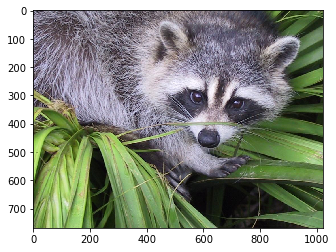

In [15]:
from scipy import misc
pic=misc.face()
plt.imshow(pic)

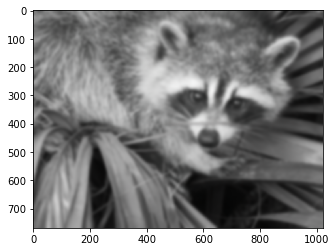

In [16]:
#对图像进行高斯模糊处理
plt.imshow(ndimage.gaussian_filter(pic,sigma=5))

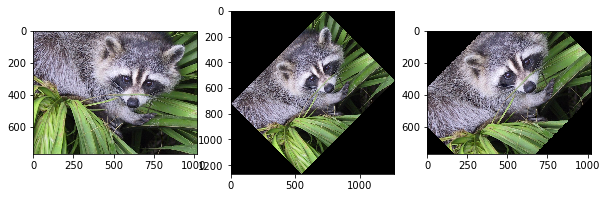

In [17]:
#对图像进行旋转处理
fig=plt.figure(figsize=(10,3))
ax1,ax2,ax3=fig.subplots(1,3)
ax1.imshow(pic)
ax2.imshow(ndimage.rotate(pic,angle=45.0))
ax3.imshow(ndimage.rotate(pic,angle=45.0,reshape=False))

In [18]:
#对图像进行卷积操作
conv=np.random.randn(2,2,3)
conv

array([[[-0.22222232,  1.17064788,  0.35384757],
        [-0.13087298,  1.06141264,  0.19587229]],

       [[ 1.23293477,  0.57832037, -0.1922074 ],
        [-0.09012862,  0.98576749, -1.25174118]]])

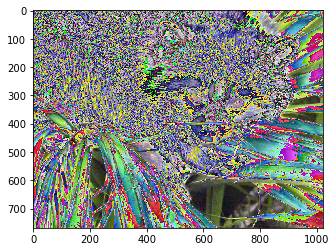

In [19]:
pic_conv=ndimage.convolve(pic,conv)
plt.imshow(pic_conv)

更多操作详见文档https://docs.scipy.org/doc/scipy/reference/ndimage.html#module-scipy.ndimage

## 优化方法

Scipy提供的scipy.optimize模块下包含了许多已经写好的优化方法  
最常用的函数莫过于scipy.optimize.minimize，只需要指定参数既可以选择大量的优化方法

In [20]:
from scipy import optimize

这里仍然使用scipy.linalg.lstsq函数演示时的数据，不同的是，  
这次使用scipy.optimize.minimize最小化残差函数来达到拟合的效果

In [21]:
def func(para,x):
    w0,w1=para[0],para[1]
    return w0*x**2+w1

In [22]:
def res_func(para,x,y):
    return func(para,x)-y

In [23]:
x = np.array([1, 2.5, 3.5, 4, 5, 7, 8.5])
y = np.array([0.3, 1.1, 1.5, 2.0, 3.2, 6.6, 8.6])

In [24]:
p_init=np.random.randn(2)
p_final=optimize.leastsq(res_func,p_init,args=(x,y))[0]
p_final

array([0.12013861, 0.20925828])

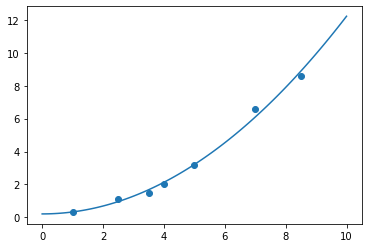

In [25]:
xx=np.linspace(0,10,100)
yy=func(p_final,xx)
plt.scatter(x,y)
plt.plot(xx,yy)

更多操作详见文档 https://docs.scipy.org/doc/scipy/reference/optimize.html#module-scipy.optimize

## 信号处理

Scipy中关于信号处理的相关方法在scipy.signal模块中，其又被划分为：卷积，B-样条，滤波，窗口函数，峰值发现，光谱分析等 13 个小类，  
共计百余种不同的函数和方法。所以说，信号处理是 Scipy 中十分重要的模块之一。

In [26]:
from scipy import signal

先尝试生成几个简单的波形函数，如锯齿波、方形波

Text(0.5, 1.0, 'gausspulse')

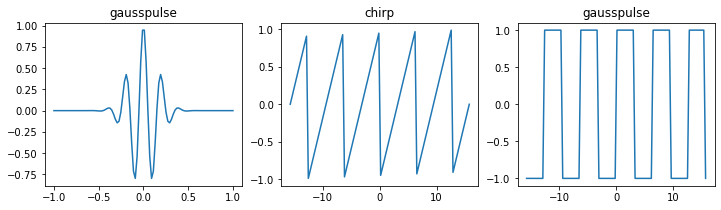

In [27]:
fig=plt.figure(figsize=(12,3))
axes=fig.subplots(1,3)
t=np.linspace(-1,1,100)
axes[0].plot(t, signal.gausspulse(t, fc=5, bw=0.5))
axes[0].set_title("gausspulse")
t *= 5*np.pi
axes[1].plot(t, signal.sawtooth(t))
axes[1].set_title("chirp")
axes[2].plot(t, signal.square(t))
axes[2].set_title("gausspulse")

再尝试应用几个信号处理的相关函数

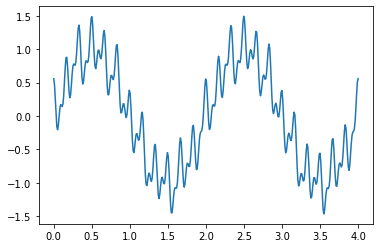

In [28]:
#生成包含噪声的波形图
def f(t): return np.sin(np.pi*t) + 0.1*np.cos(7*np.pi*t+0.3) + \
    0.2 * np.cos(24*np.pi*t) + 0.3*np.cos(12*np.pi*t+0.5)
t = np.linspace(0, 4, 400)
plt.plot(t, f(t))

使用scipy中的滤波函数对其进行处理，如中值滤波函数与维纳滤波函数

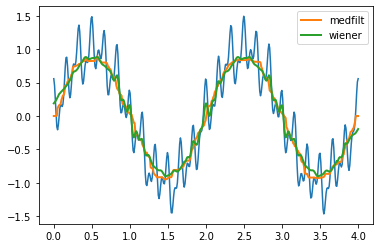

In [29]:
plt.plot(t, f(t))
plt.plot(t, signal.medfilt(f(t), kernel_size=55), linewidth=2, label="medfilt")
plt.plot(t, signal.wiener(f(t), mysize=55), linewidth=2, label="wiener")
plt.legend()

更多操作详见文档 https://docs.scipy.org/doc/scipy/reference/signal.html#module-scipy.signal

## 统计函数 

Scipy中关于统计的函数集中在模块scipy.stats，其中包含了大量的概率分布函数，如连续分布、离散分布、多变量分布等  
除此之外还有摘要统计、频率统计、转换和测试等小块

In [30]:
from scipy import stats

(array([  2.,  14.,  41., 122., 218., 247., 194., 112.,  40.,  10.]),
 array([-3.50524012, -2.86769307, -2.23014602, -1.59259897, -0.95505192,
        -0.31750488,  0.32004217,  0.95758922,  1.59513627,  2.23268332,
         2.87023036]),
 <a list of 10 Patch objects>)

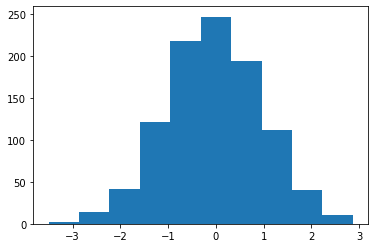

In [31]:
#绘制正态分布直方图
plt.hist(stats.norm.rvs(size=1000))

除了norm.rvs返回随机变量，norm.pdf 返回概率密度函数，morm.cdf返回累计分布函数，norm.sf返回残存函数，norm.ppf 返回分位点函数，norm.isf返回逆残存函数，norm.stats返回均值、方差、（费舍尔）偏态、（费舍尔）峰度以及norm.moment返回分布的非中心矩。  
对于这些提到的方法，对于大多数 Scipy 连续变量分布函数（柯西分布，泊松分布等）都是通用的。

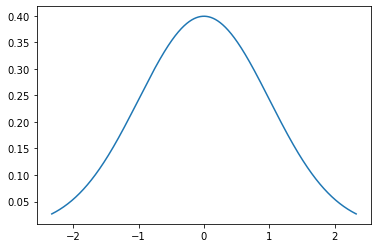

In [32]:
#基于概率密度函数绘制正态分布曲线
x = np.linspace(stats.norm.ppf(0.01),stats.norm.ppf(0.99), 1000)
plt.plot(x,stats.norm.pdf(x))

In [33]:
#dexcribe方法返回数据的摘要
stats.describe(stats.norm.pdf(x))

DescribeResult(nobs=1000, minmax=(0.02665214220345808, 0.39894119872386996), mean=0.21044655257960365, variance=0.01623826799772345, skewness=0.08072747828798667, kurtosis=-1.4646301483963586)

更多操作详见文档 https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats

## 稀疏矩阵

数值分析中，大部分元素为0的矩阵被称为稀疏矩阵。  
在科学与工程领域中求解线性模型时经常出现大型的稀疏矩阵，但是计算机在执行稀疏矩阵运算时，通常会遇到很多麻烦。  
稀疏矩阵由于其自身的稀疏特性，通过压缩可以大大节省稀疏矩阵的内存代价。  
更为重要的是，由于过大的尺寸，标准的算法经常无法操作这些稀疏矩阵。

所以说，Scipy中的scipy.sparse模块提供了关于稀疏矩阵的储存方法，  
而scipy.sparse.linalg中由包含了专门针对稀疏线性代数的处理方法。此外，scipy.sparse.csgraph 还包含了一些稀疏矩阵的拓扑图理论。

In [34]:
from scipy import sparse

先实践一下简单的稀疏矩阵存储操作,csr_matrix按行存储稀疏矩阵，csc_matrix按列存储

In [35]:
x=np.array([[1,2,0,0,0,0],[0,0,0,0,1,0],[0,1,0,0,0,0]])
x=sparse.csr_matrix(x)
print(x)

  (0, 0)	1
  (0, 1)	2
  (1, 4)	1
  (2, 1)	1


In [36]:
y=np.array([[1,2,0,0,0,0],[0,0,0,0,1,0],[0,1,0,0,0,0]])
y=sparse.csc_matrix(y)
print(y)

  (0, 0)	1
  (0, 1)	2
  (2, 1)	1
  (1, 4)	1


In [37]:
x.data

array([1, 2, 1, 1], dtype=int32)

可以观察到两种存储形式的顺序不同，但都是存储了非零元素的位置

In [38]:
#todense()方法将稀疏矩阵转化为稠密矩阵
print(x.todense())
print(y.todense())
print((x.todense()==y.todense()).all())

[[1 2 0 0 0 0]
 [0 0 0 0 1 0]
 [0 1 0 0 0 0]]
[[1 2 0 0 0 0]
 [0 0 0 0 1 0]
 [0 1 0 0 0 0]]
True


看一下稀疏矩阵相对于稠密矩阵在数据存储上的优势

In [39]:
data=np.random.rand(1000,1000)
data[data<=0.5]=0
str1="稠密矩阵消耗内存{:.3f}MB"
str2="稀疏矩阵消耗内存{:.3f}MB"
print(str1.format(data.nbytes/(1024**2)))
print(str2.format(sparse.csr_matrix(data).data.size/(1024**2)))

稠密矩阵消耗内存7.629MB
稀疏矩阵消耗内存0.478MB


更多操作详见 https://docs.scipy.org/doc/scipy/reference/sparse.html#module-scipy.sparse